In [1]:
from skimage.io import imread
from skimage.feature import hog
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [2]:
images = [imread(file) for file in glob.glob('images/*.jpg')]

In [3]:
n = len(images)

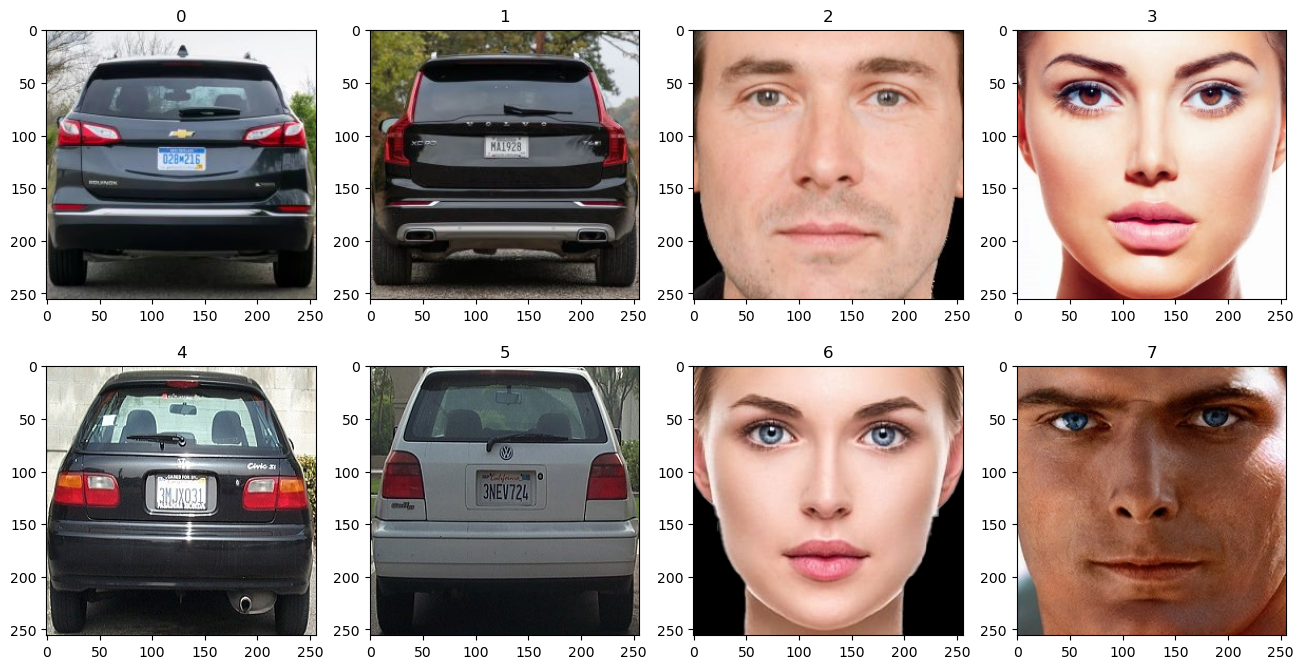

In [6]:
fig = plt.figure(figsize=(16,8))
for i in range(n):
    fig.add_subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(i)
plt.show()

                 

In [8]:
fd_list = []
fig = plt.figure(figsize=(12,12))
k = 0
for i in range(n):
    fd, hog_image = hog(images[i], orientations=9,pixels_per_cell=(16,16), cells_per_block=(10,10), visualize=True, channel_axis=2, feature_vector=True)
    fd_list.append(fd)
    fig.add_suplot(4,4 k+1)
    plt.imshow(images[i])
    plt.axis("off")

<Figure size 1200x1200 with 0 Axes>

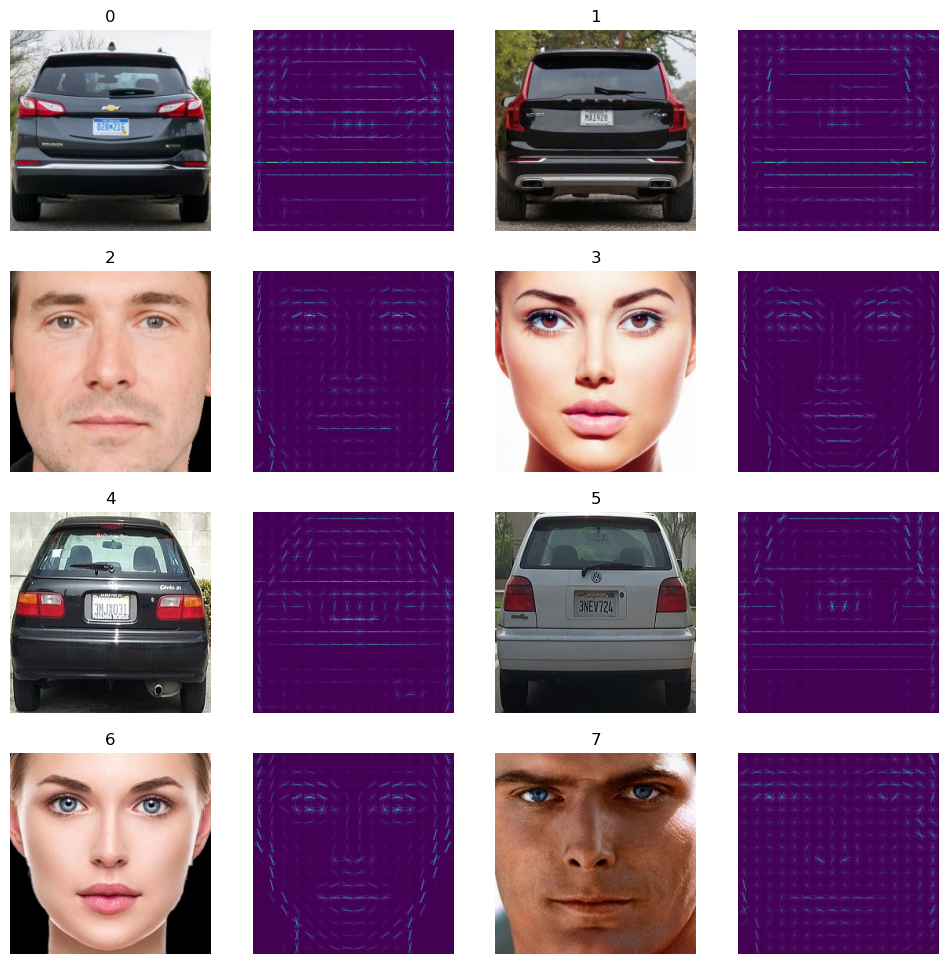

In [11]:
fd_list = []
fig = plt.figure(figsize=(12,12))
k = 0
for i in range(n):
    fd, hog_image = hog(images[i], orientations=9,pixels_per_cell=(16,16), cells_per_block=(10,10), visualize=True, channel_axis=2, feature_vector=True)
    fd_list.append(fd)
    fig.add_subplot(4,4, k+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)

    fig.add_subplot(4,4,k+2)
    plt.imshow(hog_image)
    plt.axis("off")
    k += 2
plt.show()

In [12]:
distance_matrix = np.zeros((n,n))

In [15]:
for i in range(n):
    fd_i = fd_list[i]
    for k in range(i):
        fd_k = fd_list[k]
        distance_matrix[i,k] = distance.jensenshannon(fd_i, fd_k)
distance_matrix = np.maximum(distance_matrix,distance_matrix.transpose())

In [16]:
distance_matrix

array([[0.        , 0.34127773, 0.57748906, 0.58753992, 0.40083148,
        0.43887724, 0.60136815, 0.52902833],
       [0.34127773, 0.        , 0.55205335, 0.57888648, 0.41125168,
        0.40739626, 0.59815756, 0.51074554],
       [0.57748906, 0.55205335, 0.        , 0.3511047 , 0.50228118,
        0.4975017 , 0.36731872, 0.32035547],
       [0.58753992, 0.57888648, 0.3511047 , 0.        , 0.54097777,
        0.54468357, 0.26132428, 0.40615308],
       [0.40083148, 0.41125168, 0.50228118, 0.54097777, 0.        ,
        0.3543135 , 0.55296355, 0.45464881],
       [0.43887724, 0.40739626, 0.4975017 , 0.54468357, 0.3543135 ,
        0.        , 0.54970087, 0.44470047],
       [0.60136815, 0.59815756, 0.36731872, 0.26132428, 0.55296355,
        0.54970087, 0.        , 0.41641392],
       [0.52902833, 0.51074554, 0.32035547, 0.40615308, 0.45464881,
        0.44470047, 0.41641392, 0.        ]])

In [17]:
cond_distance_matrix = distance.squareform(distance_matrix)

In [18]:
cond_distance_matrix

array([0.34127773, 0.57748906, 0.58753992, 0.40083148, 0.43887724,
       0.60136815, 0.52902833, 0.55205335, 0.57888648, 0.41125168,
       0.40739626, 0.59815756, 0.51074554, 0.3511047 , 0.50228118,
       0.4975017 , 0.36731872, 0.32035547, 0.54097777, 0.54468357,
       0.26132428, 0.40615308, 0.3543135 , 0.55296355, 0.45464881,
       0.54970087, 0.44470047, 0.41641392])

In [32]:
Z = linkage(cond_distance_matrix,method="ward")

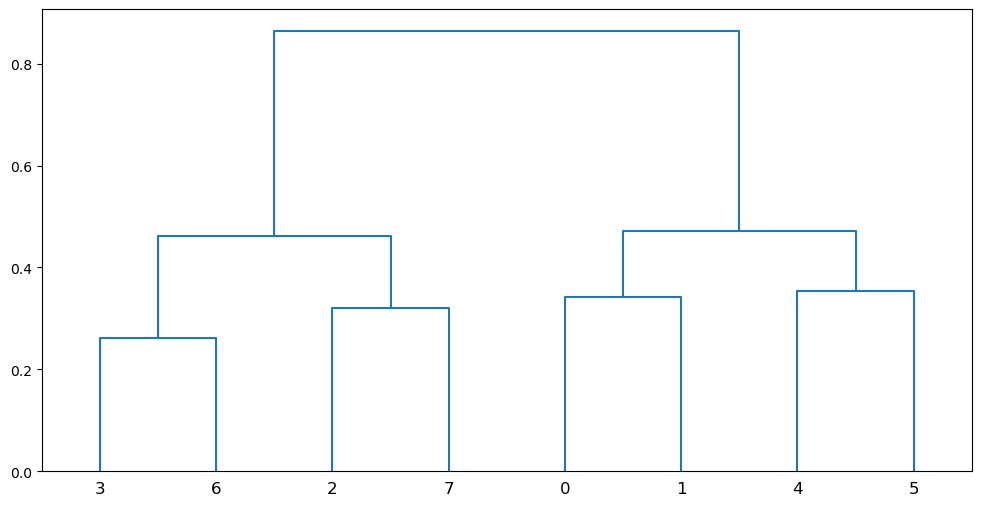

In [33]:
plt.figure(figsize=(12,6))
dendrogram(Z, color_threshold=0.2, show_leaf_counts=True)
plt.show()

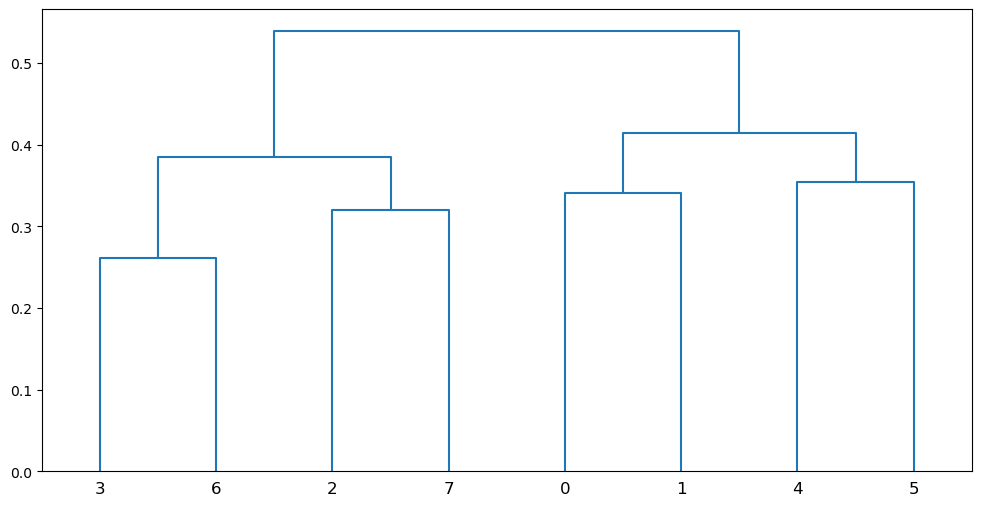

In [37]:
Z = linkage(cond_distance_matrix,method="average")
plt.figure(figsize=(12,6))
dendrogram(Z, color_threshold=0.2, show_leaf_counts=True)
plt.show()

In [23]:
n = len(images)


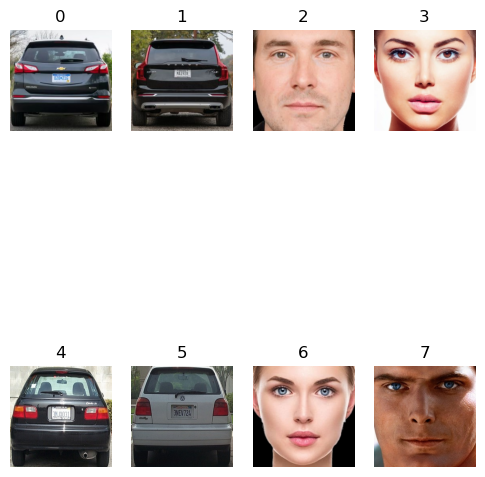

In [25]:
fig = plt.figure(figsize=(6,8))
for i in range(n):
    fig.add_subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(i)
plt.show()
    
                 